<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad2/6_XGBoost_Regresion_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 2

### Practica 6: **XGBoost_Regresion**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

**XGBoost (Extreme Gradient Boosting)**

**Como funciona**  
- Algoritmo **basado en árboles** que utiliza boosting: **construye árboles secuenciales donde cada uno corrige los errores del anterior**. Optimiza mediante gradiente y regularización.
- Es un algoritmo de ensamble basado en árboles que utiliza boosting para combinar múltiples modelos débiles.


**Ventajas**
- Alta precisión y velocidad.
- Capacidad de manejar valores faltantes automáticamente.
- Control del sobreajuste mediante regularización.
- Soporta paralelización.

**Limitaciones**
- Más complejo de configurar (muchos parámetros).
- Puede ser costoso computacionalmente.

### **Comparación con los modelos anteriores**

| Modelo              | Linealidad | Flexibilidad | Overfitting | Escalable | Interpretabilidad |
|---------------------|------------|--------------|-------------|-----------|-------------------|
| Regresión Lineal    | Alta       | Baja         | Baja        | Alta      | Alta              |
| Árbol de Decisión   | Baja       | Media        | Alta        | Alta      | Media             |
| Random Forest       | Baja       | Alta         | Baja        | Alta      | Baja              |
| SVR                 | Muy Baja   | Alta         | Baja        | Baja      | Baja              |
| **XGBoost**         | Baja       | **Muy Alta** | Baja        | **Alta**  | Media             |


## **1. Cargar datos y librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Cargar el dataset
df = pd.read_csv("autos2.csv")

# Mostrar las primeras filas
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## **2. Definir variables predictoras y variable objetivo**

In [2]:
X = df[['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']


## **3. Dividir en conjunto de entrenamiento y prueba**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Entrenar modelo XGBoost**

In [4]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## **5. Evaluar el modelo**

In [5]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Error cuadrático medio (MSE): 10882624.65
Coeficiente de determinación (R²): 0.91


In [6]:
# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error cuadrático medio (RMSE): {rmse:.2f}")

Raíz del Error cuadrático medio (RMSE): 3298.88


### **Interpretación:**

#### **1. Raiz Error Cuadrático Medio (RMSE) ≈ $3,298**

* El error promedio en la predicción de precios es de aproximdamente 3,300.
* Dado que la mayoría de tus autos están en el rango de 7,780 a 16,502, este error representa un margen relativo de aproximadamente 20% a 42%, lo cual es aceptable pero no excelente.
* Es ligeramente peor que el árbol de decisión y Random Forest en cuanto a error absoluto.

#### **2. Coeficiente de Determinación (R² = 0.91)**

* El R² mide **qué proporción de la variación en la variable dependiente (`precio`) puede ser explicada por el modelo**.
* XGBoost explica el 91% de la varianza en los precios.
* Aunque es un resultado muy bueno, sigue estando ligeramente por debajo del 92% obtenido con otros modelos basados en árboles.

## **6. Comparar precios reales vs predichos**


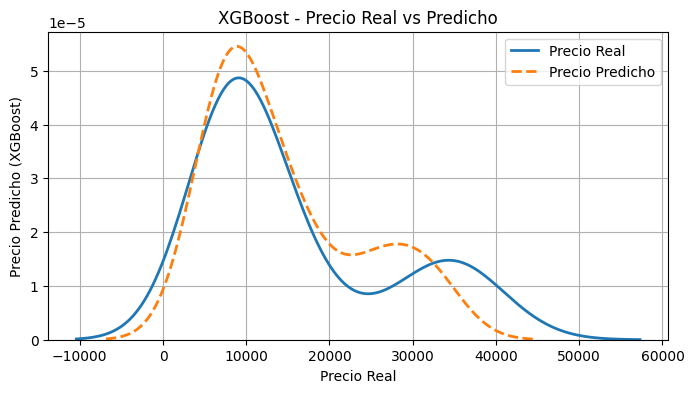

In [7]:
#plt.scatter(y_test, y_pred, color='darkred')
plt.figure(figsize=(8, 4))
sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred, label='Precio Predicho', linewidth=2, linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho (XGBoost)")
plt.title("XGBoost - Precio Real vs Predicho")
plt.legend()
plt.grid(True)
plt.show()

### **Comparar precios con diagrama de dispersión**

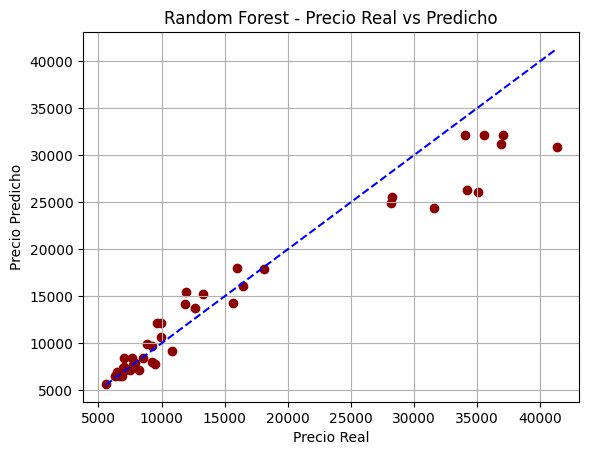

In [9]:
plt.scatter(y_test, y_pred, color='darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')  # Línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Random Forest - Precio Real vs Predicho")
plt.grid(True)
plt.show()

### **Especificando parametros**

Error cuadrático medio (MSE): 9242721.95
Coeficiente de determinación (R²): 0.92
Raíz del Error cuadrático medio (RMSE): 3040.18




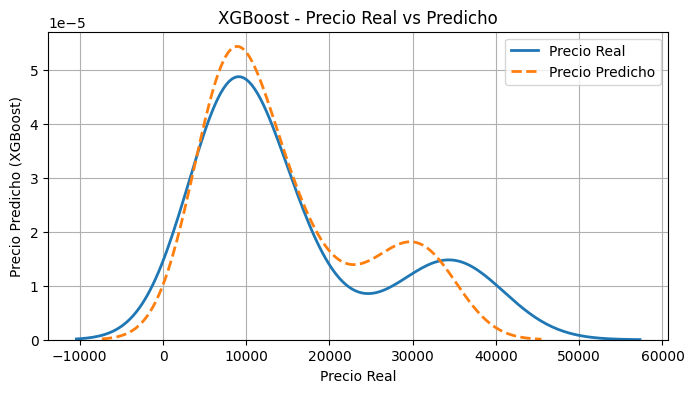

In [23]:
xgb_model2 = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
xgb_model2.fit(X_train, y_train)

# Evaluar
y_pred = xgb_model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Raíz del Error cuadrático medio (RMSE): {rmse:.2f}")
print("\n")

plt.figure(figsize=(8, 4))
sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred, label='Precio Predicho', linewidth=2, linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho (XGBoost)")
plt.title("XGBoost - Precio Real vs Predicho")
plt.legend()
plt.grid(True)
plt.show()

### **Interpretación**

**1. Pico Principal (Precio Bajo/Medio, $\approx 10,000$)**:
* Ambas curvas se alinean perfectamente. El modelo XGBoost es muy preciso en el segmento más poblado (el grueso de los vehículos).  

**2. Segundo Pico (Precio Alto, $\approx 35,000$)**:
* La curva de predicción (naranja) es ligeramente más baja y más dispersa que la curva real (azul). Esto indica que el modelo no predice los precios altos con la misma confianza y tiende a "suavizar" esa distribución.

**3. Distribución de la Variación**:
* La curva de predicción (naranja) está ligeramente más concentrada en el centro y menos en los extremos que la curva real (azul).

### **Diagrama de dispersión**

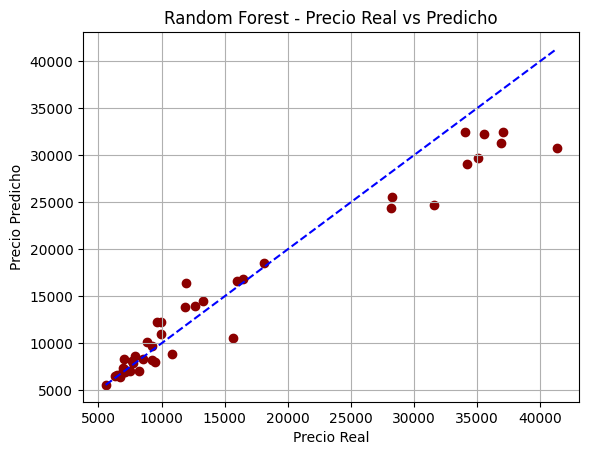

In [14]:
plt.scatter(y_test, y_pred, color='darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')  # Línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Random Forest - Precio Real vs Predicho")
plt.grid(True)
plt.show()

### **Interpretación**

**1. Segmento de Precios Bajos/Medios**
* ($\text{Precio Real} < 20,000$): La precisión es excelente. Los puntos están muy cerca de la línea, indicando predicciones muy fiables en este rango.  

**2. Segmento de Precios Altos**
* ($\text{Precio Real} > 30,000$): La precisión disminuye y se observa una subestimación sistemática. Los puntos se encuentran en general debajo de la línea ideal.
 * Ejemplo: El vehículo con $\text{Precio Real}$ de $\approx 41,000$ fue predicho en $\approx 31,000$, lo que muestra el mayor error absoluto del modelo.

### **Comparativa de los 2 modelos**

* **$R^2$ (Precisión Explicativa):**
* El Modelo 2 tiene un $R^2$ más alto ($0.92$) que el Modelo 1 ($0.91$).Esto significa que el Modelo 2 explica un $\mathbf{92\%}$ de la varianza en el precio de los vehículos, mientras que el Modelo 1 explica el $91\%$. El Modelo 2 es marginalmente mejor en términos de ajuste global a los datos.

* **$\text{RMSE}$ (Error Promedio):**
* El Modelo 2 tiene un $\text{RMSE}$ más bajo ($3,040.18$) que el Modelo 1 ($3,298.88$). Esto es la métrica más importante en unidades de negocio: en promedio, el Modelo 2 se equivoca en la predicción del precio por $\mathbf{\$3,040.18}$, mientras que el Modelo 1 se equivoca en $\approx \$3,300$.

### **Búsqueda de mejores parámetros**

In [20]:
from sklearn.model_selection import GridSearchCV

# Definición del modelo base (usa XGBRegressor, no es necesario pasar parámetros aquí)
xgb_base = XGBRegressor(random_state=42, eval_metric='rmse')
# Nota: eval_metric='rmse' se usa para evitar advertencias de XGBoost

# Definición de la rejilla
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

# Inicialización de Grid Search
grid_search_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='r2',
    cv=5,                 # Es mejor usar cv=5 para más robustez en XGBoost
    n_jobs=-1,
    verbose=2
)

# Ejecución del ajuste
grid_search_xgb.fit(X_train, y_train)

# Evalúar con:
print("Mejores Parámetros:", grid_search_xgb.best_params_)
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mejores Parámetros: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}


### **Reentrenar el modelo XGBoost con Los hiperparámetros seleccionados por GridSearch (Óptimos)**

*Fitting 5 folds for each of 324 candidates, totalling 1620 fits*

Se usuaron $324$ combinaciones de hiperparámetros, y con validación cruzada (cv=5), se entrenaron y evaluaron un total de $1,620$ modelos ($324 \times 5$).

Error cuadrático medio (MSE): 10248895.59
Coeficiente de determinación (R²): 0.92
Raíz del Error cuadrático medio (RMSE): 3201.39




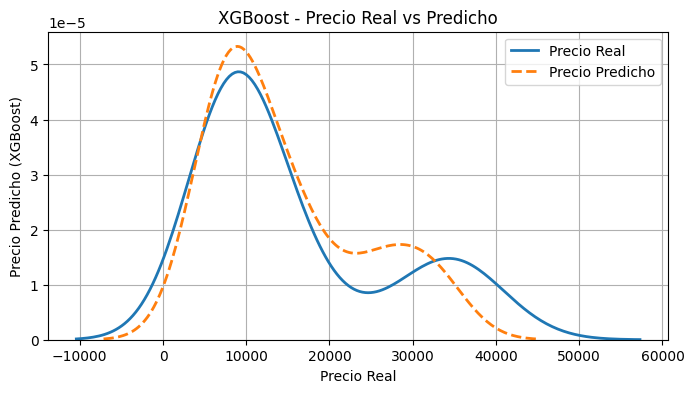

In [22]:
# 1. Crear el modelo final con los parámetros óptimos
best_xgb_model = XGBRegressor(
    colsample_bytree=0.7,
    learning_rate=0.05,
    max_depth=7,
    min_child_weight=1,
    n_estimators=300,
    subsample=0.9,
    random_state=42,
    eval_metric='rmse'
)

# 2. Entrenar el modelo final
best_xgb_model.fit(X_train, y_train)

# 3. Evaluar
y_pred = best_xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Raíz del Error cuadrático medio (RMSE): {rmse:.2f}")
print("\n")

plt.figure(figsize=(8, 4))
sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred, label='Precio Predicho', linewidth=2, linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho (XGBoost)")
plt.title("XGBoost - Precio Real vs Predicho")
plt.legend()
plt.grid(True)
plt.show()

### **Interpretacion**
* El modelo XGBoost ajustado explica el $92\%$ de la varianza en el precio de los vehículos. Este es un ajuste muy alto y robusto.
* La Raíz del Error Cuadrático Medio ($\text{RMSE}$) RMSE en promedio, la predicción del precio se desvía del precio real por $\mathbf{\$3,201.39}$.
* Excelente rendimiento, y **robustamente generalizado gracias a la optimización**.

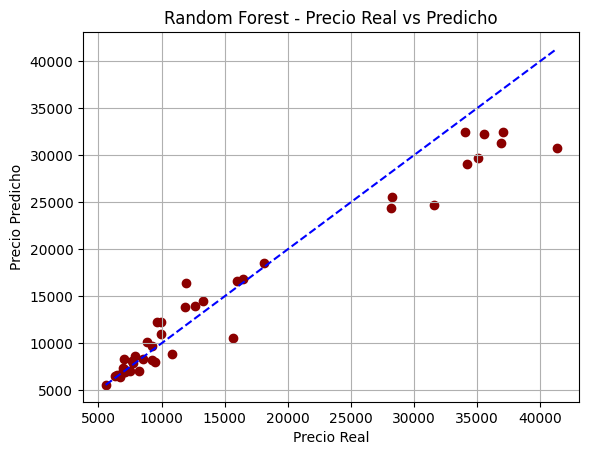

In [24]:
plt.scatter(y_test, y_pred, color='darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')  # Línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Random Forest - Precio Real vs Predicho")
plt.grid(True)
plt.show()